In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
# Download data: https://aqicn.org/data-platform/register/
df = pd.read_csv('data/wuhan-air-quality_20200317.csv', sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')

# Convert to datetime
df['date'] =  pd.to_datetime(df['date'], format='%Y/%m/%d')

df = df.set_index('date')

# We care only about NO2 values by date
# https://earthobservatory.nasa.gov/images/146362/airborne-nitrogen-dioxide-plummets-over-china
# "The maps on this page show concentrations of nitrogen dioxide, a noxious gas emitted by motor vehicles, power plants, and industrial facilities. The maps above show NO2 values across China from January 1-20, 2020 (before the quarantine) and February 10-25 (during the quarantine)."
df = df.drop(df.columns[[0, 1, 2, 4, 5]], axis=1)

# Convert from multindex to columns
df.reset_index(inplace=True)  

print(df.shape)
print(df.dtypes)

# List columns, # of rows w non-null in each column, column data types 
df.info()
df.describe()

df.head()

(2143, 2)
date    datetime64[ns]
no2            float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 2 columns):
date    2143 non-null datetime64[ns]
no2     2118 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 33.6 KB


,date,no2
0,2020-03-02,10.0
1,2020-03-03,10.0
2,2020-03-04,15.0
3,2020-03-05,15.0
4,2020-03-06,12.0


In [3]:
df.index.names

FrozenList([None])

In [4]:
print(df.columns.tolist())

['date', 'no2']


In [5]:
df.nsmallest(5, "no2") 

,date,no2
22,2020-02-07,6.0
30,2020-02-15,6.0
70,2020-01-26,6.0
71,2020-01-27,6.0
31,2020-02-16,7.0


In [6]:
df.nlargest(5, "no2")

,date,no2
1597,2015-04-23,81.0
1675,2015-01-10,78.0
1676,2015-01-11,77.0
1629,2015-05-25,74.0
1981,2014-05-16,74.0


D:\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


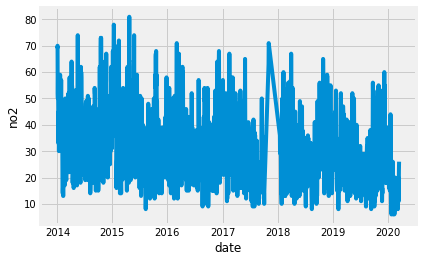

In [7]:
sns.lineplot(x="date", y="no2", data=df)

In [8]:
# Add year 
df['Year'] = pd.DatetimeIndex(df['date']).year

# Add feature for YYYY-MM
df['Month'] = df['date'].dt.to_period('M')
df['MonthName'] = df['date'].dt.strftime('%b')
df['MonthYear'] = df['date'].dt.strftime('%Y-%b')

# Add feature for week 
df['Week'] = df['date'].dt.to_period(freq = 'W')  

df['DayOfYear'] = df['date'].dt.dayofyear 
df['DayOfWeek'] = df['date'].dt.dayofweek # 0 = Sunday 
df['Day'] = df['date'].dt.day_name()
df['_IsWeekend'] = np.where(df['Day'].isin(['Saturday', 'Sunday']), 1, 0) # Add a boolean column 
df= df.sort_values(['Year', 'DayOfYear'])

In [9]:
df.head()

,date,no2,Year,Month,MonthName,MonthYear,Week,DayOfYear,DayOfWeek,Day,_IsWeekend
2142,2014-01-01,69.0,2014,2014-01,Jan,2014-Jan,2013-12-30/2014-01-05,1,2,Wednesday,0
2028,2014-01-02,70.0,2014,2014-01,Jan,2014-Jan,2013-12-30/2014-01-05,2,3,Thursday,0
2029,2014-01-03,52.0,2014,2014-01,Jan,2014-Jan,2013-12-30/2014-01-05,3,4,Friday,0
2030,2014-01-04,50.0,2014,2014-01,Jan,2014-Jan,2013-12-30/2014-01-05,4,5,Saturday,1
2031,2014-01-05,59.0,2014,2014-01,Jan,2014-Jan,2013-12-30/2014-01-05,5,6,Sunday,1


In [10]:
df1 = df[(df["DayOfYear"] >= 50) & (df["DayOfYear"] < 80)]

# Alternate:
months = ['Mar']
x = df.query("MonthName in @months")
x.head()

,date,no2,Year,Month,MonthName,MonthYear,Week,DayOfYear,DayOfWeek,Day,_IsWeekend
2086,2014-03-01,19.0,2014,2014-03,Mar,2014-Mar,2014-02-24/2014-03-02,60,5,Saturday,1
2087,2014-03-02,26.0,2014,2014-03,Mar,2014-Mar,2014-02-24/2014-03-02,61,6,Sunday,1
2088,2014-03-03,34.0,2014,2014-03,Mar,2014-Mar,2014-03-03/2014-03-09,62,0,Monday,0
2089,2014-03-04,39.0,2014,2014-03,Mar,2014-Mar,2014-03-03/2014-03-09,63,1,Tuesday,0
2090,2014-03-05,37.0,2014,2014-03,Mar,2014-Mar,2014-03-03/2014-03-09,64,2,Wednesday,0


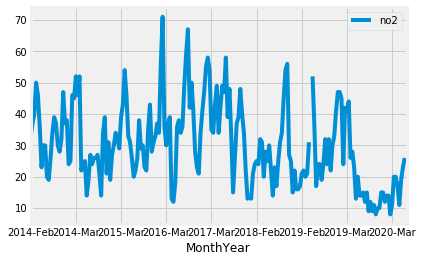

In [11]:
df1.plot(x='MonthYear', y='no2')

In [18]:
# pip install plotly_express
import plotly.express as px
px.line(
    df1
    , x='DayOfYear'
    , y= 'no2'
    , color = 'Year'
)